<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers.default = "png"
import plotly.express as px

# Исследование структуры данных

1. Прочитаем данные с помощью библиотеки Pandas. Также перед чтением учитываем разделитель внутри файла. 

In [2]:
hh_data = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')
hh_data.shape

(44744, 12)

2. Выведем несколько первых строк таблицы, чтобы убедиться в том, что наши данные не повреждены. Ознакомимся с признаками и их структурой.

In [3]:
display(hh_data.head())

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведем основную информацию о числе непустых значений в столбцах и их типах в таблице. Также обратим внимание на информацию о числе непустых значений.

In [4]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Выведем основную статистическую информацию о столбцах.


In [5]:
hh_data.describe(include=['object'])

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создадим с помощью функции-преобразования новый признак **"Образование"**, который будет иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполним преобразование, ответим на поставленные перед нами вопросы и в конце удалим признак "Образование и ВУЗ".

Также обратим внимание на структуру текста в столбце **"Образование и ВУЗ"**. Текущий уровень образования соискателя всегда находится в первых 2-ух словах и начинается с заглавной буквы. Воспользуемся этим.


In [6]:
def get_level_education(arg):
    """Извлекает уровень образования
    
    Args: 
        str: текстовое значение признака
        
    Returns:
        str: уровень по 4 категориям    
    """
    education = ' '.join(arg.split()[:3])
    if 'Высшее' in education:
        return 'Высшее'
    if 'Неоконченное высшее' in education:
        return 'Неоконченное высшее'
    if 'Среднее специальное' in education:
        return 'Среднее специальное'
    return 'Среднее'

# преобразовываем признак с образованием
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(get_level_education)

# удаляем исходный признак и обновляем датафрейм
hh_data.drop('Образование и ВУЗ', axis=1, inplace=True)

print('Число соискателей со средним уровнем образования:', 
      hh_data['Образование'].value_counts()['Среднее'], 'человек')

Число соискателей со средним уровнем образования: 559 человек


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создадим два новых признака **"Пол"** и **"Возраст"**. При этом учитываем:
* Признак пола имеет 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста представлен целыми числами.

Выполним преобразование, ответим на поставленные перед нами вопросы и удалим признак **"Пол, возраст"** из таблицы.

Также обратим внимание на структуру текста в столбце, в частности на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Структура одинакова для всех строк в таблице. Воспользуемся этим.


In [7]:
def get_age(arg):
    """Извлечение возраста
        
    Args:
        str: текстовое значение признака
        
    Returns:
        int: числовой показатель возраста        
    """
    age = arg.split()
    key_words = ['год', 'года', 'лет']
    for index, elem in enumerate(age):
        if elem in key_words:
            return int(age[index-1])

hh_data['Пол'] = hh_data['Пол, возраст'].apply(lambda x: x[0])
hh_data['Возраст'] = hh_data['Пол, возраст'].apply(get_age)
hh_data.drop('Пол, возраст', axis=1, inplace=True)

print('Процент женских резюме в данных:', 
      round(hh_data['Пол'].value_counts(normalize=True)['Ж'] * 100, 2), '%')
print('Средний возраст соискателей:', 
      round(hh_data['Возраст'].mean(), 2), 'года')

Процент женских резюме в данных: 19.07 %
Средний возраст соискателей: 32.2 года


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…

Учтем эту особенность в нашем коде.

В результате преобразования у нас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполним преобразование, ответим на вопросы и удалим столбец **"Опыт работы"** из таблицы.


In [8]:
def get_exp(arg):
    """Извлечение опыта работы 
    
    Args:
        str: текстовое значение признака
        
    Returns:
        int: числовой показатель опыта работы в месяцах        
    """
    if arg is np.nan or arg =='Не указано':
        return None
    year_words = ['год', 'года', 'лет']
    month_words = ['месяц', 'месяца', 'месяцев']
    exp = arg.split()[:7]
    months = 0
    years = 0
    for index, elem in enumerate(exp):
        if elem in year_words:
            years = int(exp[index-1])
        if elem in month_words:
            months = int(exp[index-1])
    return int(years*12 + months)

hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(get_exp)
hh_data.drop('Опыт работы', axis=1, inplace=True)

print('Медианный опыт работы соискателей:', 
      round(hh_data['Опыт работы (месяц)'].median()), 'месяцев')

Медианный опыт работы соискателей: 100 месяцев


4. Отлично! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначим как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Информация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратим внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратим внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Будем по умолчанию считать, что такие соискатели не готовы к командировкам.
    
Выполним преобразования и удалим столбец **"Город, переезд, командировки"** из таблицы.


In [9]:
def get_city(arg):
    """Получает город поиска вакансии
    
    Args: 
        str: текстовое значение признака
        
    Returns:
        str: название одной из 4 категорий города    
    """
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 
                      'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 
                      'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград'
                     ]
    city = arg.split(' , ')[0]
    if city == 'Москва':
        return 'Москва'
    elif city == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    elif city in million_cities:
        return 'Город-миллионник'
    return 'Другие'

def moving_indicator(arg):
    """Показатель готовности к переезду в виде булева значения 
    
    Args: 
        str: текстовое значение признака
        
    Returns:
        bool: True - готов, False - не готов    
    """    
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    return True

def trip_indicator(arg):
    """Показатель готовности к командировкам в виде булева значения 
    
    Args: 
        str: текстовое значение признака
        
    Returns:
        bool: True - готов, False - не готов    
    """     
    if ('командировка' in arg):
        if ('не готов к командировкам' in arg) or ('не готова к командировкам' in arg):
            return False
        else:
            return True
    else:
        return False

hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(get_city)
hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(moving_indicator)
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(trip_indicator)
hh_data.drop('Город, переезд, командировки', axis=1, inplace=True)

mask1 = hh_data['Город'] == 'Санкт-Петербург'
mask2 = hh_data['Готовность к переезду'] == True
mask3 = hh_data['Готовность к командировкам'] == True
print('Соискателей из Санкт-Петербурга:', 
      round(hh_data[mask1].shape[0] / hh_data.shape[0] * 100), '%')
print('Соискателей, готовых к переезду и командировкам:', 
      round(hh_data[mask2 & mask3].shape[0] / hh_data.shape[0] * 100), '%')

Соискателей из Санкт-Петербурга: 11 %
Соискателей, готовых к переезду и командировкам: 32 %


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>

Выполним данное преобразование для признаков "Занятость" и "График", ответим на поставленные вопросы, после чего удалим их из таблицы.

In [10]:
# списки уникальных категорий по столбцам "Занятость" и "График"
employments = hh_data['Занятость'].str.cat(sep=', ').split(', ')
employments = list(set(employments))

schedules = hh_data['График'].str.cat(sep=', ').split(', ')
schedules = list(set(schedules))

for employment, schedule in zip(employments, schedules):
    hh_data[employment] = hh_data['Занятость'].apply(lambda x: employment in x)
    hh_data[schedule] = hh_data['График'].apply(lambda x: schedule in x)

hh_data.drop(['Занятость', 'График'], axis=1, inplace=True)

mask1 = hh_data['проектная работа'] 
mask2 = hh_data['волонтерство']
mask3 = hh_data['вахтовый метод']
mask4 = hh_data['гибкий график']
print('Кол-во людей в поисках проектной работы и волонтерства:', 
      hh_data[mask1 & mask2].shape[0])
print('Кол-во людей, предпочитающий вахтовый метод работы с гибким графиком:', 
      hh_data[mask3 & mask4].shape[0])

Кол-во людей в поисках проектной работы и волонтерства: 436
Кол-во людей, предпочитающий вахтовый метод работы с гибким графиком: 2311


6. Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Предварительно сделаем выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019.

Создадим новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед нами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуемся этой информацией в наших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на поставленные вопросы удалим исходный столбец заработной платы "ЗП" и все промежуточные столбцы.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Переводим признак "Обновление резюме" из таблицы с резюме в формат datetime и достаем из него дату. В тот же формат приводим признак "date" из таблицы с валютами.
2. Выделяем из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты переводим в стандарт ISO согласно таблице выше.
3. Присоединяем к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты. Значение close для рубля заполняем единицей 1 (курс рубля самого к себе)
4. Умножаем сумму желаемой заработной платы на присоединенный курс валюты (close) и делим на пропорцию (обращаем внимание на пропуски после объединения в этих столбцах), результат заносим в новый столбец "ЗП (руб)".


In [11]:
# читаем датасет с курсами валют
exchange_rates = pd.read_csv('ExchangeRates.csv')

# преобразуем признаки в формат datetime для извлечения дат
exchange_rates['date'] = pd.to_datetime(exchange_rates['date']).dt.date
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме']).dt.date

# функция выделения суммы заработной платы
def get_salary(arg):
    """Извлечение числового значения желаемой заработной платы 
    
    Args: 
        str: текстовое значение признака
        
    Returns:
        int: числовой показатель заработной платы    
    """     
    salary = int(arg.split()[0])
    return salary

hh_data['Сумма ЗП'] = hh_data['ЗП'].apply(get_salary)

hh_data['Валюта ЗП'] = hh_data['ЗП'].apply(lambda x: x.split()[1].replace('.', ''))
curr_dict = {'грн': 'UAH', 'USD': 'USD', 
             'EUR': 'EUR', 'белруб': 'BYN', 
             'KGS': 'KGS', 'сум': 'UZS', 
             'AZN': 'AZN', 'KZT': 'KZT', 
             'руб': 'RUB'
            }
# заменяем наименования валют соответствующей им ISO кодировкой
hh_data['Валюта ЗП'] = hh_data['Валюта ЗП'].map(curr_dict)

# объединяем датасет с курсами валют
merged_df = pd.merge(hh_data, exchange_rates, how='left', 
                   left_on=['Обновление резюме', 'Валюта ЗП'], 
                   right_on=['date', 'currency']
                  )

# заполняем NaN значениями для рубля
merged_df['close'] = merged_df['close'].fillna(1)
merged_df['proportion'] = merged_df['proportion'].fillna(1)

hh_data['ЗП (руб)'] = merged_df['Сумма ЗП'] * merged_df['close'] / merged_df['proportion']
hh_data.drop(['ЗП', 'Сумма ЗП', 'Валюта ЗП'], axis=1, inplace=True)

print('Желанная медианная ЗП соискателей:', 
      round(hh_data['ЗП (руб)'].median() / 1000), 'тыс.руб.')

Желанная медианная ЗП соискателей: 59 тыс.руб.


# Исследование зависимостей в данных

1. Построим распределение признака **"Возраст"**. Опишем распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения мы бы причислили к их числу?

*Строим постройте гистограмму и коробчатую диаграмму рядом.*

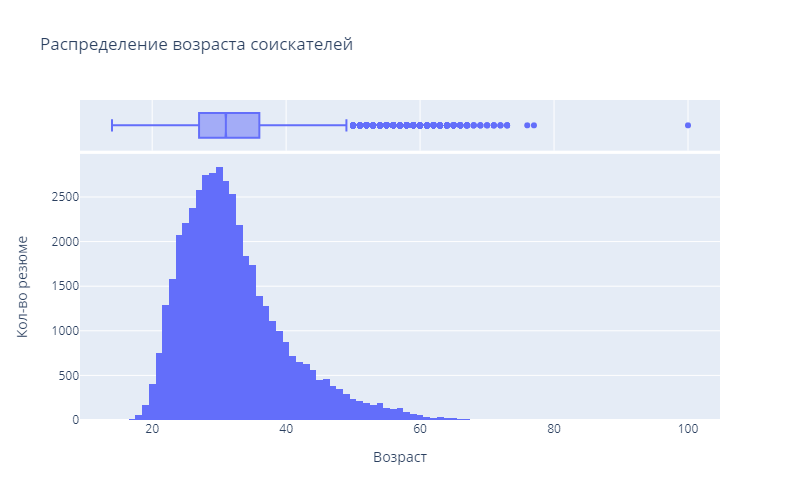

In [12]:
fig = px.histogram(
    data_frame=hh_data, 
    title='Распределение возраста соискателей',  
    x='Возраст',
    marginal='box', 
    width=800
)
fig.layout.yaxis.title.text='Кол-во резюме'
fig.show()

По гистограмме можно увидеть, что **возраст соискателей распределен от 14 до 100 лет, модальное значение находится в районе 30 лет**. Далее с возрастом идет плавное снижение количества резюме соискателей -  наблюдается обратная зависимость. Вероятно, более возрастные соискатели обзаводятся профессиональными связями внутри своей сферы деятельности, либо имеют карьерный рост на текущем месте работы. Распределение похоже на логнормальное.

**Большинство резюме принадлежит соискателям 23-36 лет**. Это закономерно, поскольку основная часть молодых людей начинают искать работу после завершения обучения, а большая часть вакансий рассчитана либо на полный рабочий день, либо на сменный график. Кроме того, люди молодого возраста, к тому же еще и без образования редко соответствуют требованиям работодателей, для них недоступна работа, где требуется высокая квалификация и опыт. 

Выпадающее из общей картины значение в 100 лет выглядит как выброс, т.к. вряд ли человек столь почтенного возраста ищет работу. Скорее всего, произошла техническая ошибка на платформе, либо пользователь в шутку указал такое значение.


2. Построим распределение признака **"Опыт работы (месяц)"**. Опишем данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения мы бы причислили к их числу?

*Строим гистограмму и коробчатую диаграмму рядом.*

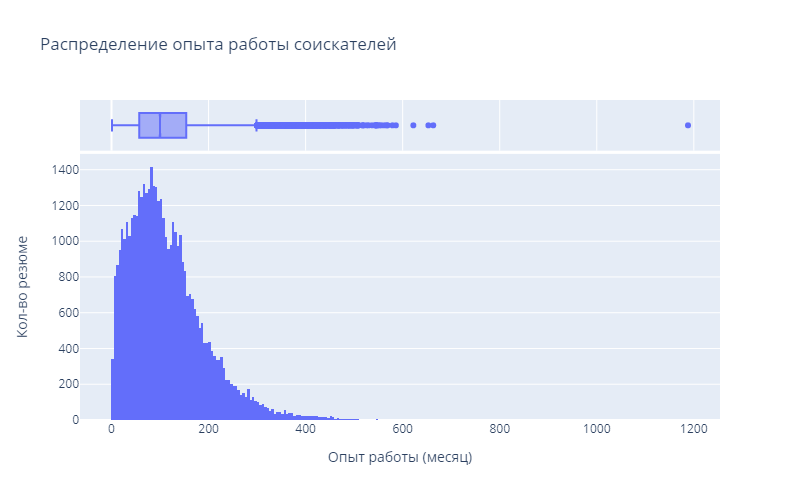

In [13]:
fig = px.histogram(
    data_frame=hh_data, 
    title='Распределение опыта работы соискателей',  
    x='Опыт работы (месяц)',
    marginal='box', 
    width=800
)
fig.layout.yaxis.title.text='Кол-во резюме'
fig.show()

**Опыт работы соискателей распределен от 0 до 1188 месяцев, модальное значение опыта расположено в районе 80 – 84 месяцев (7 лет опыта работы)**. Большинство соискателей имеют опыт от 1 года до 13 лет. Опыт работы 1 год и чуть больше – это именно тот опыт, с которым молодые специалисты, выпускники учебных заведений «выходят» на рынок труда.

Значение в 1188 месяцев (99 лет) является очевидным выбросом. Кроме того, аномалиями можно считать значения 622, 653 и 663 месяца соответственно (более 50 лет работы).

3. Построим распределение признака **"ЗП (руб)"**. Опишем данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Также обратим внимание на гигантские размеры желаемой заработной платы.

*Строим гистограмму и коробчатую диаграмму рядом.*


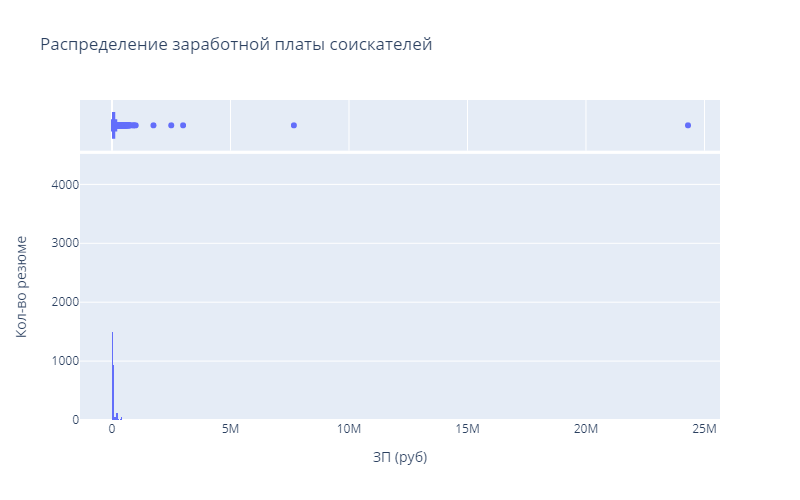

In [14]:
fig = px.histogram(
    data_frame=hh_data, 
    title='Распределение заработной платы соискателей',  
    x='ЗП (руб)',
    marginal='box', 
    width=800
)
fig.layout.yaxis.title.text='Кол-во резюме'
fig.show()

**Желаемая заработная плата большинства соискателей находится в интервале от 22 до 102 тыс. руб.**, что является адекватным запросом согласно реалиям современного рынка труда. 

**Модальное значение распределения составляет 59 тыс. руб., само распределение желаемой заработной платы находится в диапазоне от 1 рубля до 24,3 млн. руб**. Такой огромный разброс сумм связан с тем, что соискатели ищут не только отечественных, но и зарубежных работодателей. Например, в США сумму заработной платы принято указывать в долларовом эквиваленте и сразу за один год. Выбросом на графике является значение 24,3 млн. руб., т.к. даже по меркам США 2 млн. 25 тыс. руб. ($ 33750 в месяц) компании уровня FAANG не готовы платить инженерам средней квалификации. К выбросам также можно отнести суммы, которые ниже 1 тыс. руб.

4. Построим диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используем для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.

*Попробуем найти ответы по диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Важен ли признак уровня образования при прогнозировании заработной платы?*

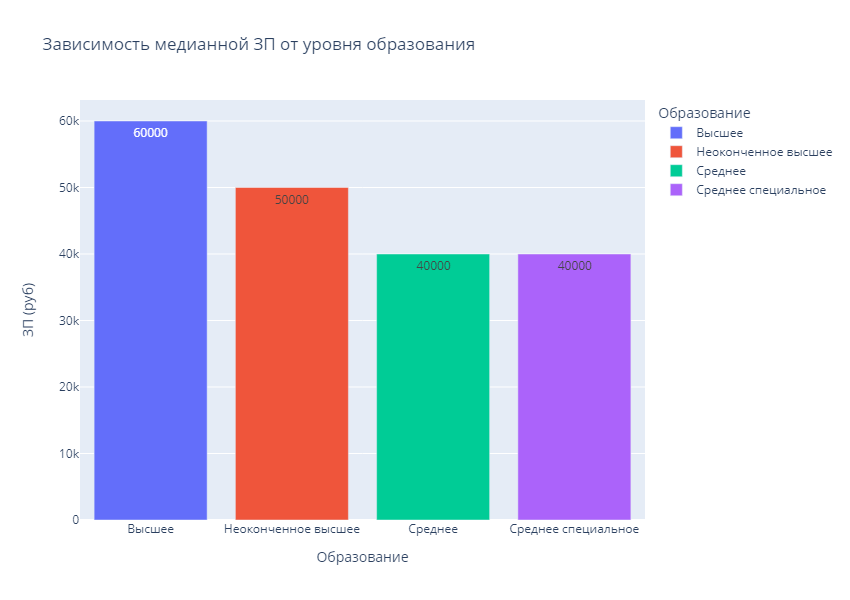

In [15]:
bar_data = hh_data[hh_data['ЗП (руб)'] < 1e6]
bar_data = bar_data.groupby(
    by='Образование', 
    as_index=False
)['ЗП (руб)'].median()

fig = px.bar(
    data_frame=bar_data, 
    x='Образование', 
    y='ЗП (руб)', 
    text='ЗП (руб)', 
    height=600, 
    width=850, 
    color='Образование',
    title='Зависимость медианной ЗП от уровня образования'
)

fig.show()

По графику видно, что зарплатные ожидания соискателей со школьным и средним специальным образованием одинаковы. **С ростом уровня образования растут и требования к заработной плате**. Наибольшую медианную заработную плату хотят специалисты с высшим образованием. Таким образом, уровень образования коррелирует с суммой заработной платы соискателей, следовательно **признак уровня образования является важным при построении модели машинного обучения**.

5. Построим диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используем для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.

*Сформулируем выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Важен ли признак города при прогнозировании заработной платы?*

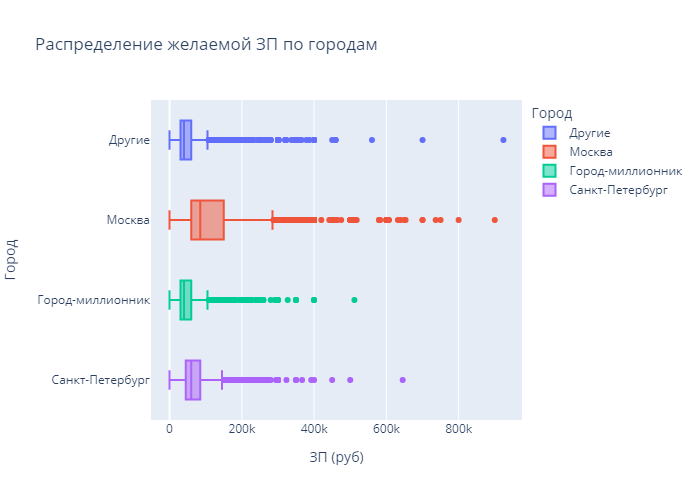

In [16]:
box_data = hh_data[hh_data['ЗП (руб)'] < 1e6]

fig = px.box(box_data, 
             x='ЗП (руб)', 
             y='Город', 
             color='Город', 
             title='Распределение желаемой ЗП по городам'
)

fig.show()

Наиболее высокий размах заработных плат (до 285 тыс. руб.) и медианный уровень (85 тыс. руб.) демонстрирует Москва, далее за ней следует Санкт-Петербург. Все это является довольно важным признаком при прогнозировании зарплат ML-моделью. Показатели по другим городам и городам-миллионникам практически не отличаются, следовательно их можно объединить в единую категорию.

6. Построим **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируем график, сравнив уровень заработной платы в категориях.

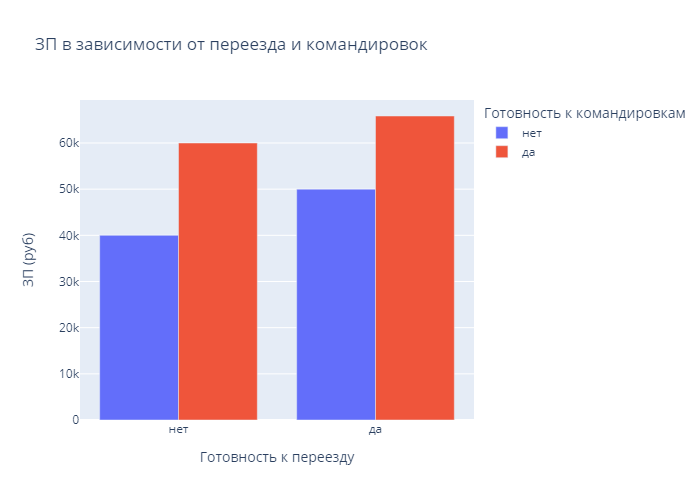

In [17]:
plot_data = hh_data.groupby(
    ['Готовность к переезду', 'Готовность к командировкам'], 
    as_index=False)['ЗП (руб)'].median()
plot_data.replace({True: 'да', False: 'нет'}, inplace=True)

fig = px.bar(
    plot_data, 
    x='Готовность к переезду', 
    y='ЗП (руб)', 
    color='Готовность к командировкам', 
    barmode='group',
    title= 'ЗП в зависимости от переезда и командировок'
)

fig.show()

**Готовность соискателя к переезду повышает ожидаемую заработную плату на 25%**. Люди, **готовые к командировкам**, но не готовые к переезду, ожидают от работодателя **оплаты труда как минимум в 1.5 раза больше** по сравнению со специалистами, для которых служебные командировки не предусмотрены.  Наиболее высокую оплату требуют соискатели, готовые и к переезду, и к командировкам – это ценные специалисты с уже наработанной клиентской базой. 

7. Построим сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице построим **тепловую карту**. Проанализируем тепловую карту, сравнив показатели внутри групп.

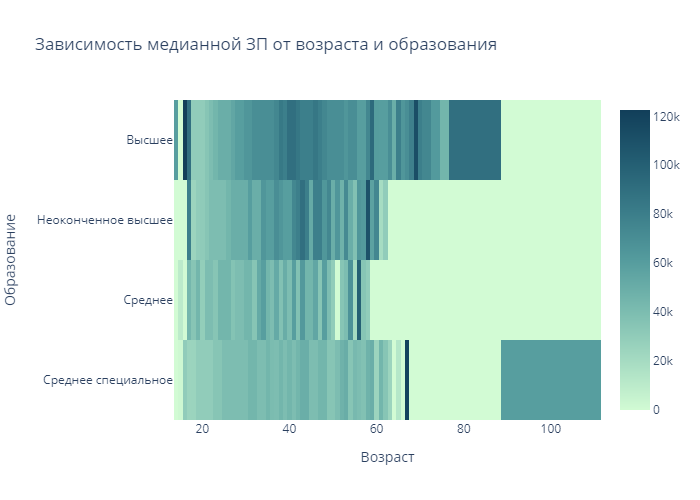

In [18]:
pivot = pd.pivot_table(
    hh_data,
    values='ЗП (руб)',
    index='Образование', 
    columns='Возраст', 
    aggfunc='median', 
    fill_value=0)

fig = px.imshow(
    pivot, 
    color_continuous_scale='darkmint', 
    title='Зависимость медианной ЗП от возраста и образования'
)

fig.show()

**Наиболее яркую тенденцию к повышению уровня ЗП имеют соискатели с высшим образованием**. Это обусловлено постоянным повышением ценности себя как специалиста, расширением должностных обязанностей и быстрым карьерным ростом. Кроме того, эта категория соискателей **дольше всех остается активной на рынке труда**. Менее выраженную, но все же тенденцию к росту также демонстрируют люди с неоконченным высшим образованием. **Оплата труда специалистов со школьным и средним специальным образованием с возрастом практически не меняется** и остается на одном и том же уровне.

Также можно заметить несколько выбросов в категории «Высшее» для соискателей 14 – 17 лет и «Среднее специальное» для 67 лет.

8. Построим **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведем из месяцев в года, чтобы признаки были в едином масштабе. Построим на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя).

Кол-во выбросов: 7


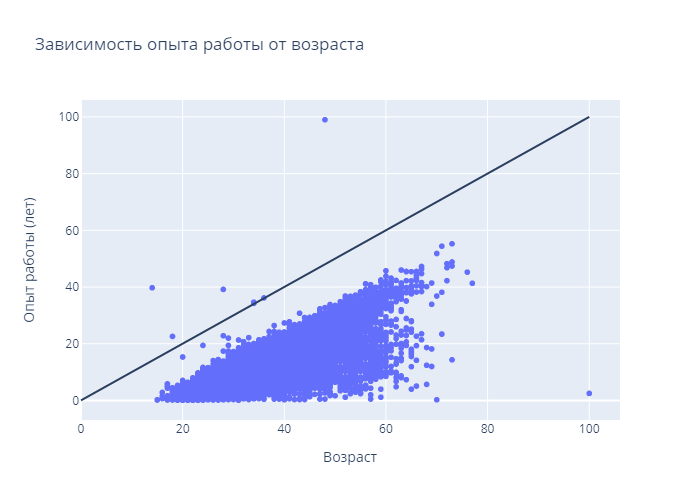

In [19]:
scatter_df = hh_data[['Опыт работы (месяц)', 'Возраст']]
scatter_df = scatter_df.copy()
scatter_df['Опыт работы'] = scatter_df['Опыт работы (месяц)'] / 12

fig = px.scatter(
    scatter_df, 
    x='Возраст', 
    y='Опыт работы', 
    title='Зависимость опыта работы от возраста'
)

print('Кол-во выбросов:', scatter_df[scatter_df['Опыт работы'] >= scatter_df['Возраст']].shape[0])
fig.add_shape(type='line', x0=0, y0=0, x1=100, y1=100)

fig.update_layout(
    yaxis_title='Опыт работы (лет)'
)

fig.show()

На сайте представлены соискатели с разнообразным опытом работы – **от людей без опыта (студенты) до специалистов с 30-летним и даже 40-летним опытом работы**. Большинство резюме не приближается к линии – разделителю. Это свидетельствует о том, что люди в течение трудовой деятельности неоднократно меняют специальность, а при отклике на вакансии принято указывать именно релевантный опыт работы.

Точки, лежащие выше прямой – выбросы, поскольку возраст человека не может быть равен опыту работы в годах.

**Проведем еще пару дополнительных исследований**

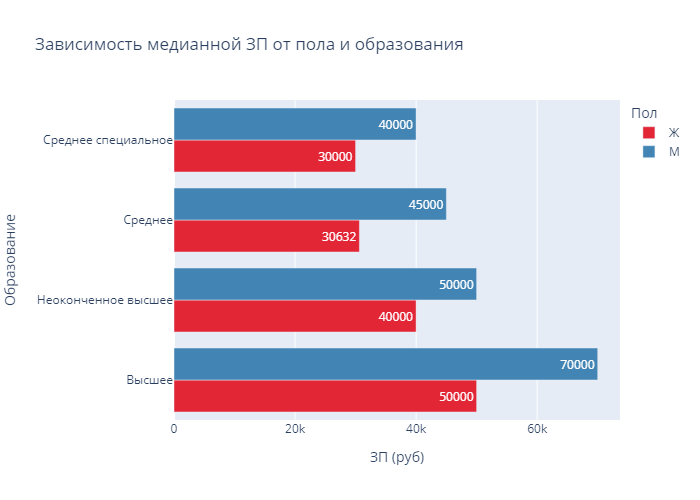

In [20]:
# группировка по полу и образованию
salary_df = hh_data.groupby(by=['Пол', 'Образование'], as_index=False)['ЗП (руб)'].median()

bar_data = px.bar(
    data_frame=salary_df, 
    x='ЗП (руб)', 
    y='Образование', 
    color='Пол', 
    color_discrete_sequence=['#E32636', '#4285B4'], 
    text='ЗП (руб)', # подписи столбцов
    barmode='group', 
    title='Зависимость медианной ЗП от пола и образования'
)

bar_data.show()

**Вне зависимости от уровня образования,  мужчины оценивают свои услуги выше, чем женщины. С ростом уровня образования растут и требования к заработной плате – такая тенденция сохраняется у обоих полов**. Наиболее высокий медианный показатель  - у мужчин с высшим образованием (70 тыс. руб.). Примечательно, что соискатели со средним уровнем  оценили свои услуги немного выше, чем люди с законченным средним специальным образованием. Видимо, это связано с тем, что такая категория людей старается после школы сразу же устроиться на любую доступную для них работу, получить свой первый практический опыт и быстрее начать зарабатывать.

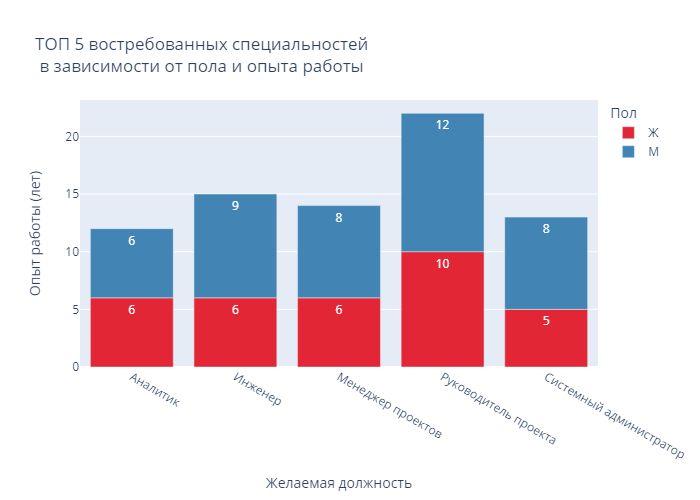

In [21]:
# выделяем 5 самых востребованных у соискателей специальностей
top5_vacancies = hh_data['Ищет работу на должность:'].value_counts().head().index
df_vacancies = hh_data[hh_data['Ищет работу на должность:'].isin(top5_vacancies)]

df_vacancies = df_vacancies.groupby(
    by=['Ищет работу на должность:', 'Пол'], 
    as_index=False)['Опыт работы (месяц)'].median()

# переводим опыт работы из месяцев в годы
df_vacancies['Опыт работы (лет)'] = df_vacancies['Опыт работы (месяц)'].apply(lambda x: round(x/12))

fig = px.bar(
    data_frame=df_vacancies, 
    x='Ищет работу на должность:', 
    y='Опыт работы (лет)', 
    color='Пол', 
    color_discrete_sequence=['#E32636', '#4285B4'], 
    text='Опыт работы (лет)', 
    labels={'Ищет работу на должность:': 'Желаемая должность'}, 
    title='ТОП 5 востребованных специальностей <br> в зависимости от пола и опыта работы' 
)

fig.show()

Здесь наблюдается похожая тенденция. **Показатели опыта работы у мужчин немного превосходят значения опыта работы у женщин**, поскольку женщины периодически берут отпуск по уходу за ребенком, чаще меняют специальность и место работы. Иными словами, женщины чаще «выпадают» из трудовой деятельности, чем мужчины.  Однако надо напомнить, что исходя из предыдущих исследований доля женских резюме на сайте составляет всего 1/5 от общего количества. Такое соотношение свидетельствует о не совсем корректной выборке среди всех пользователей сайта hh.ru.

**Наиболее востребованные у соискателей специальности – менеджмент и технические профессии. Больше всего опыта имеется у соискателей, претендующих на управленческую должность «Руководитель проекта»**.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдем **полные дубликаты** в таблице с резюме и удалим их. 

In [22]:
mask = hh_data.duplicated()
duplicates = hh_data[mask]
print(f'Число найденных дубликатов: {duplicates.shape[0]}')

# удаляем дубликаты и получаем очищенный датасет
hh_data = hh_data.drop_duplicates()

Число найденных дубликатов: 161


2. Займемся пропусками. Выведем информацию **о числе пропусков** в столбцах. 

In [23]:
cols_null_count = hh_data.isnull().sum()
cols_with_null = cols_null_count[cols_null_count > 0].sort_values(ascending=False)
cols_with_null

Опыт работы (месяц)                168
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалим строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполним **медианным** значением.

In [24]:
hh_data = hh_data.dropna(subset=['Последняя/нынешняя должность', 'Последнее/нынешнее место работы'])
median_value = hh_data['Опыт работы (месяц)'].median()
hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы (месяц)'].fillna(median_value)
print(f"Среднее значение опыта работы (месяц): {round(hh_data['Опыт работы (месяц)'].mean())}")

Среднее значение опыта работы (месяц): 114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалим резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [25]:
mask1 = hh_data['ЗП (руб)'] > 1e6
mask2 = hh_data['ЗП (руб)'] < 1e3
outliers = hh_data[mask1 | mask2]
hh_data = hh_data.drop(outliers.index, axis=0)
print('Кол-во выявленных выбросов:', outliers.shape[0])

Кол-во выявленных выбросов: 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдем такие резюме и удалим их из данных


In [26]:
outliers = hh_data[(hh_data['Опыт работы (месяц)'] / 12) > (hh_data['Возраст'])]
print('Кол-во выявленных выбросов:', outliers.shape[0])
hh_data = hh_data.drop(outliers.index, axis=0)

Кол-во выявленных выбросов: 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуем построить распределение признака в **логарифмическом масштабе**. Добавим к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

Посмотрим, в какую сторону асимметрично логарифмическое распределение. 

Найдем выбросы с помощью метода z-отклонения и удалим их из данных, используя логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмем 4 сигмы) в **правую сторону**.

Выведем таблицу с полученными выбросами и оценим, с каким возрастом соискатели попадают под категорию выбросов.

Численный показатель асимметрии: 0.4523422276053838
Число выбросов по методу z-отклонения: 3


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,удаленная работа,стажировка,полный день,проектная работа,сменный график,полная занятость,гибкий график,волонтерство,вахтовый метод,ЗП (руб)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-06-04,Не указано,Среднее,М,15,2.0,Санкт-Петербург,...,True,False,False,False,True,False,True,False,False,10000.0
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-09-04,Не указано,Среднее специальное,М,15,3.0,Другие,...,False,False,True,False,False,True,False,False,False,2000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,Среднее специальное,М,100,30.0,Санкт-Петербург,...,True,True,True,True,False,True,True,False,False,60000.0


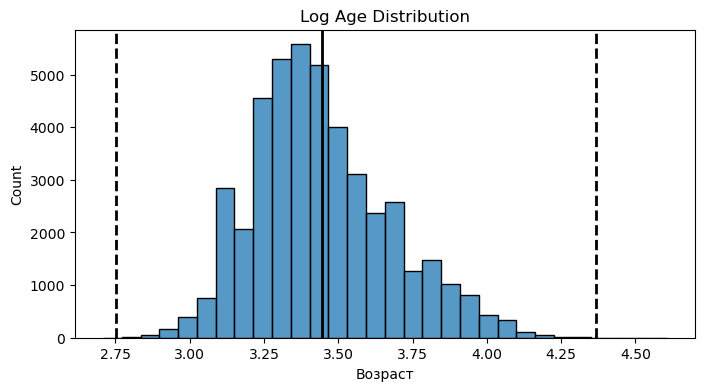

In [27]:
# гистограмма в логарифмическом масштабе
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age= np.log(hh_data['Возраст'])
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.set_title('Log Age Distribution')
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean()+ 4 * log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 * log_age.std(), color='k', ls='--', lw=2);

print('Численный показатель асимметрии:', log_age.skew())

def outliers_z_score(data, feature, log_scale=False, left=3, right=3):
    """Идентификация выбросов по методу сигм 
    
    Args: 
        data: исходный датафрейм
        feature: столбец поиска выбросов
        log_scale(bool): логарифмирование значений признака. Defaults to False
        left(int): левая граница распределения. Defaults to 3
        right(int): правая граница распределения. Defaults to 3
        
    Returns:
        outliers: датафрейм с полученными выбросами
        cleaned: очищенный от выбросов датафрейм
    """ 
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

# поиск и удаление выбросов
outliers, cleaned = outliers_z_score(hh_data, 'Возраст', log_scale=True, right=4)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
hh_data = hh_data.drop(outliers.index, axis=0)

# выведем таблицу с полученными выбросами
display(outliers)

Из графика можно увидеть, что **асимметрия является правосторонней**. Это также подтверждает численный положительный показатель, который был дополнительно нами вычислен.

**В таблицу с выбросами попали пара значений резюме соискателей возраста 15 лет, и одно значение возрастом 100 лет**.